<a href="https://colab.research.google.com/github/EmilianoCastelan/Investigacion-de-Operaciones-/blob/main/Tablero_Colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

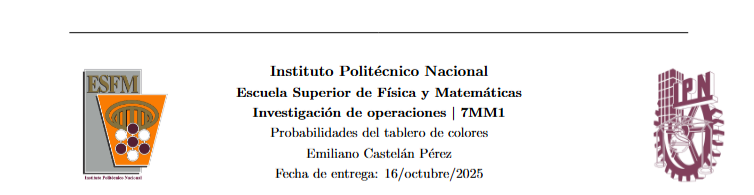

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Matriz de transición
A = np.array([
    [1/4,   0,   1/4,  1/2],
    [1/2, 1/4,    0,   1/4],
    [1/4, 1/2,  1/4,    0],
    [  0, 1/4,  1/2,  1/4]
])

En una cadena de Markov , si es ergódica como esta, lo que quiere decir que es irreducible y aperiódica, la distribución de probabilidad converge a un vector estacionario π que cumple: π=π⋅A

Convertimos el problema \( π = π A \) en \( π^T = A^T π^T \).
  - La transposición facilita la resolución del sistema de ecuaciones lineales.
  - \( A^T \) es la matriz transpuesta de \( A \).

 **Formar el Sistema de Ecuaciones**

 Aquí cree la matriz \( M = A^T - I \) para resolver \( (A^T - I)π^T = 0 \).
  - \( I \) es la matriz identidad del mismo tamaño que \( A \).
  - \( M \) representa el sistema de ecuaciones lineales que define la distribución estacionaria.

  **Añadir la Condición de Suma**

  Agregue la condición de que la suma de las probabilidades en \( π \) debe ser igual a 1.
  - Añadimos una fila de unos a \( M \) para incluir la ecuación \( π_1 + π_2 + π_3 + π_4 = 1 \).
  - El vector \( b \) es \([0, 0, 0, 1]^T\), donde el último elemento corresponde a la condición de suma.



In [4]:
def calcular_distribucion_estacionaria(A):
    # Transponer la matriz para resolver π = πA como π^T = A^T π^T
    A_transpuesta = A.T

    # Restar la matriz identidad para resolver (A^T - I)π^T = 0
    I = np.eye(len(A))
    M = A_transpuesta - I

    # Añadir la condición de que la suma de las probabilidades es 1
    M = np.vstack([M, np.ones(len(A))])

    # Vector de ceros con un 1 al final por la condición de suma
    b = np.zeros(len(A) + 1)
    b[-1] = 1

    # Resolver el sistema lineal
    pi = np.linalg.lstsq(M, b, rcond=None)[0]

    return pi

# Calcular la distribución estacionaria
pi = calcular_distribucion_estacionaria(A)

# Resultados
sectores = ["Naranja", "Azul", "Verde", "Rojo"]
for i, sector in enumerate(sectores):
    print(f"Probabilidad en {sector}: {pi[i]:.4f}")

Probabilidad en Naranja: 0.2500
Probabilidad en Azul: 0.2500
Probabilidad en Verde: 0.2500
Probabilidad en Rojo: 0.2500


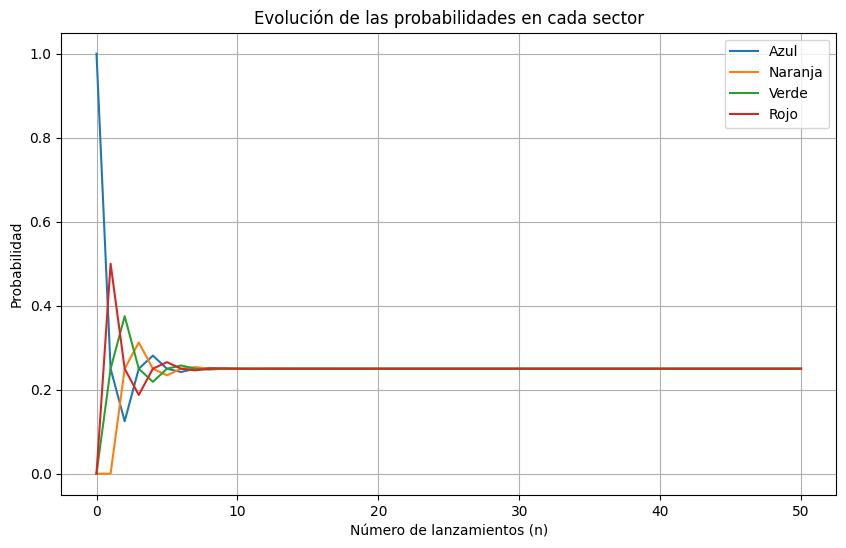

In [9]:
X_0 = np.array([1, 0, 0, 0]) #Vector inicial, empezando en el sector naranja
n_lanzamientos = 50
probabilidades = np.zeros((n_lanzamientos + 1, 4))
probabilidades[0, :] = X_0

# Calcular las probabilidades para cada n
for n in range(1, n_lanzamientos + 1):
    probabilidades[n, :] = probabilidades[n-1, :] @ A

# Grafica
sectores = [ "Azul","Naranja", "Verde", "Rojo"]
plt.figure(figsize=(10, 6))

for i, sector in enumerate(sectores):
    plt.plot(range(n_lanzamientos + 1), probabilidades[:, i], label=sector)

plt.xlabel("Número de lanzamientos (n)")
plt.ylabel("Probabilidad")
plt.title("Evolución de las probabilidades en cada sector")
plt.legend()
plt.grid(True)
plt.show()